# Explore here

In [64]:
# Your code here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LassoCV, Lasso
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_percentage_error


In [2]:
df = pd.read_csv("../data/raw/demographic_health_data.csv")

In [3]:
df

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,56037,43051,6104,14.178532,6326,14.694200,5359,12.448027,6577,15.277229,...,2098,8.9,8.3,9.6,2834,2.6,2.4,2.8,821,5
3136,56039,23081,2384,10.328842,2185,9.466661,2967,12.854729,4093,17.733200,...,928,7.2,6.5,8.0,1360,2.4,2.2,2.6,447,5
3137,56041,20299,3121,15.375142,3205,15.788955,2153,10.606434,2702,13.311001,...,1163,10.4,9.5,11.2,1500,3.0,2.8,3.2,430,5
3138,56043,7885,858,10.881420,1113,14.115409,715,9.067850,903,11.452124,...,506,11.3,10.3,12.1,686,3.4,3.2,3.7,207,6


In [4]:
#borramos las columnas con intervalo de confianza para que no afecte al resultado de las predicciones
columnas_CI = ["Heart disease_Lower 95% CI", "Heart disease_Upper 95% CI", "diabetes_Lower 95% CI", "diabetes_Upper 95% CI", "Obesity_Lower 95% CI", "Obesity_Upper 95% CI", "COPD_Lower 95% CI", "COPD_Upper 95% CI", "CKD_Lower 95% CI", "CKD_Upper 95% CI", "anycondition_Lower 95% CI", "anycondition_Upper 95% CI"]

In [5]:
df = df.drop(columns=columnas_CI)

In [6]:
#vemos los valores nulos pero no hay
columnas_con_nulos = df.columns[df.isnull().any()].tolist()
columnas_con_nulos

[]

In [7]:
#miramos si hay duplicados
df.duplicated().sum()

np.int64(0)

In [13]:
df.dtypes[df.dtypes == 'object']

COUNTY_NAME    object
STATE_NAME     object
dtype: object

In [26]:
df['COUNTY_NAME'].nunique()

1841

In [27]:
df['STATE_NAME'].nunique()

51

In [28]:
#BORRAMOS LAS COLUMNAS STATE_NAME Y COUNTY_NAME PORQUE SON VALORES STRING
df = df.drop(columns=['STATE_NAME', 'COUNTY_NAME'])

In [29]:
df

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,Obesity_number,Heart disease_prevalence,Heart disease_number,COPD_prevalence,COPD_number,diabetes_prevalence,diabetes_number,CKD_prevalence,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,15193,7.9,3345,8.6,3644,12.9,5462,3.1,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,50761,7.8,13414,8.6,14692,12.0,20520,3.2,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,8013,11.0,2159,12.1,2373,19.7,3870,4.5,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,6894,8.6,1533,10.0,1789,14.1,2511,3.3,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,15112,9.2,4101,10.5,4661,13.5,6017,3.4,1507,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,56037,43051,6104,14.178532,6326,14.694200,5359,12.448027,6577,15.277229,...,10672,5.9,1862,6.6,2098,8.9,2834,2.6,821,5
3136,56039,23081,2384,10.328842,2185,9.466661,2967,12.854729,4093,17.733200,...,3655,5.2,981,4.9,928,7.2,1360,2.4,447,5
3137,56041,20299,3121,15.375142,3205,15.788955,2153,10.606434,2702,13.311001,...,4944,7.2,1034,8.0,1163,10.4,1500,3.0,430,5
3138,56043,7885,858,10.881420,1113,14.115409,715,9.067850,903,11.452124,...,1730,8.2,500,8.3,506,11.3,686,3.4,207,6


In [30]:
#he decidido hacer la predicción sobre la prevalencia de cardiopatías
X = df.drop(columns='Heart disease_prevalence')
y = df['Heart disease_prevalence']

In [31]:
#formamos los conjuntos de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [32]:
#ESCALAMOS LOS DATOS
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
#ENTRENAMOS EL MODELO DE REGRESIÓN LINEAL BASE
m_linear = LinearRegression().fit(X_train_scaled, y_train)
#hacemos las predicciones sobre el conjunto de entrenamiento y de test
yhat_train_linear = m_linear.predict(X_train_scaled)
yhat_linear = m_linear.predict(X_test_scaled)

In [35]:
# Creamos una función que mida el error en ambos conjuntos y la diferencia
def get_metrics(yhat, y_test, yhat_train, y_train):
  metrics_train = r2_score(y_train, yhat_train), median_absolute_error(y_train, yhat_train), mean_absolute_percentage_error(y_train, yhat_train)*100
  metrics_test = r2_score(y_test, yhat), median_absolute_error(y_test, yhat), mean_absolute_percentage_error(y_test, yhat)*100
  metrics_diff = list(map(lambda x: x[1]-x[0], zip(metrics_train, metrics_test)))
  return pd.DataFrame(data=[metrics_train, metrics_test, metrics_diff], columns=['R2', 'Median AE', 'MAPE'], index=['Train set', 'Test set', 'Diferencia'])

In [36]:
get_metrics(yhat_linear, y_test, yhat_train_linear, y_train)

,R2,Median AE,MAPE
Train set,0.984304,0.134982,2.046427
Test set,0.936678,0.131169,2.366394
Diferencia,-0.047626,-0.003813,0.319967


In [43]:
df_metrics = get_metrics(yhat_linear, y_test, yhat_train_linear, y_train)

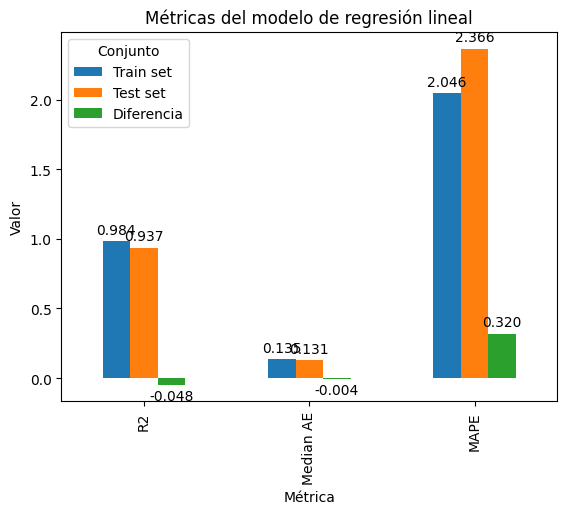

In [ ]:
#HACEMOS UN PLOT DE LAS MÉTRICAS 
df_metrics_T = df_metrics.T
ax = df_metrics_T.plot(kind='bar')
plt.title('Métricas del modelo de regresión lineal')
plt.ylabel('Valor')
plt.xlabel('Métrica')
plt.legend(title='Conjunto')
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', padding=3)
plt.show()

In [ ]:
#Entrenamos el df con Lasso de 0 a 20 
alphas = np.linspace(0,20,50)
m_lasso = LassoCV(alphas=alphas, cv=5, random_state=42, n_jobs=-1).fit(X_train_scaled, y_train)
#hacemos las predicciones
yhat_train_lasso = m_lasso.predict(X_train_scaled)
yhat_lasso = m_lasso.predict(X_test_scaled)

/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:681: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:681: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.112e+01, tolerance: 6.273e-01
  model = cd_fast.enet_coordinate_descent_gram(
/home/vscode/.local/lib/python3.11/site-p

In [53]:
print("Mejor alpha:", m_lasso.alpha_)

Mejor alpha: 0.0


/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py:1363: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.133e+01, tolerance: 7.780e-01
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_co

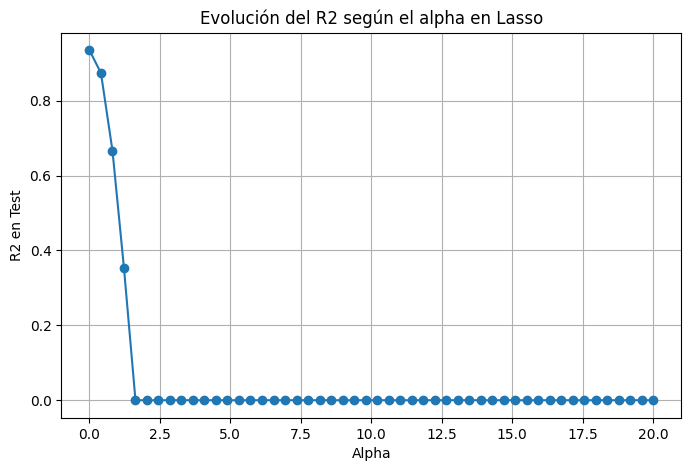

In [ ]:
#graficamos la evolución de R2 
r2_scores = []
for alpha in alphas:
    model = Lasso(alpha=alpha, random_state=42, max_iter=10000)
    model.fit(X_train_scaled, y_train)
    yhat = model.predict(X_test_scaled)
    r2 = r2_score(y_test, yhat)
    r2_scores.append(r2)
plt.figure(figsize=(8, 5))
plt.plot(alphas, r2_scores, marker='o')
plt.title('Evolución del R2 según el alpha en Lasso')
plt.xlabel('Alpha')
plt.ylabel('R2 en Test')
plt.show()

In [55]:
get_metrics(yhat_lasso, y_test, yhat_train_lasso, y_train)

,R2,Median AE,MAPE
Train set,0.983398,0.139627,2.107024
Test set,0.968359,0.132805,2.255661
Diferencia,-0.015039,-0.006822,0.148638


In [56]:
df_metrics_lasso = get_metrics(yhat_lasso, y_test, yhat_train_lasso, y_train)
df_metrics_lasso_T = df_metrics_lasso.T

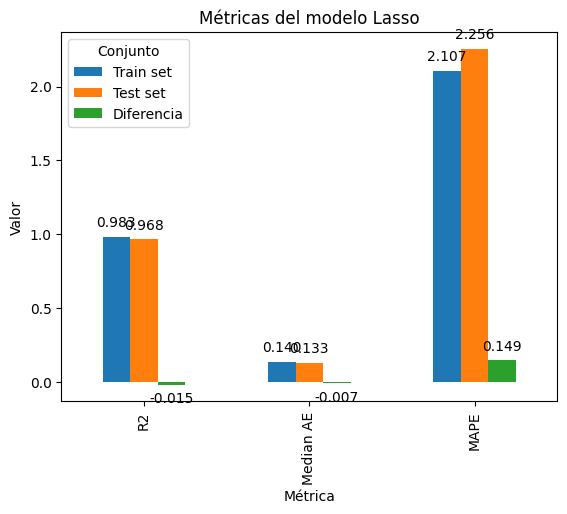

In [59]:
#HACEMOS UN PLOT DE LAS MÉTRICAS 
ax = df_metrics_lasso_T.plot(kind='bar')
plt.title('Métricas del modelo Lasso')
plt.ylabel('Valor')
plt.xlabel('Métrica')
plt.legend(title='Conjunto')
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', padding=5)
plt.show()

In [60]:
#vamos a hacer una comparación del R2 de los dos modelos:
r2_linear = df_metrics.loc['Test set', 'R2']
r2_lasso = df_metrics_lasso.loc['Test set', 'R2']

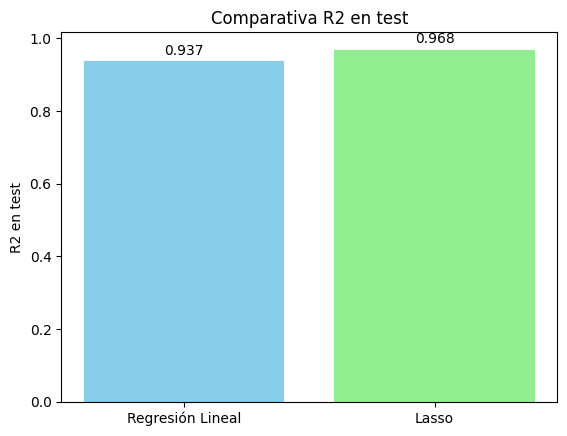

In [ ]:
modelos = ['Regresión Lineal', 'Lasso']
valores_r2 = [r2_linear, r2_lasso]
plt.bar(modelos, valores_r2, color=['skyblue', 'lightgreen'])
plt.ylabel('R2 en test')
plt.title('Comparativa R2 en test')
for i, v in enumerate(valores_r2):
    plt.text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')
plt.show()

Tras entrenar ambos modelos, observamos que el modelo Lasso mejora el rendimiento respecto a la regresión lineal simple. Con un R² en test de 0.96 frente al 0.93 de la regresión lineal, Lasso consigue ajustar mejor la relación entre los factores socio-demográficos y la prevalencia de enfermedades cardíacas, reduciendo el riesgo de sobreajuste y mejorando la capacidad predictiva.